# 基于隐马尔可夫模型的笔势识别

1. 数据：1-project1-data.zip。该数据集有 5 个文件，每个是一个元音字母的笔势。这些是xml 文件，格式易读。以奇数索引条目作为训练数据，偶数作测试数据。

In [1]:
import xml.etree.ElementTree as ET

gesture_list = ['a', 'e', 'i', 'o', 'u']
dataset = {}

def get_one_dataset(path):
    tree = ET.parse(path)
    root = tree.getroot()
    word_dataset = []
    
    for training_example in root.findall('trainingExample'):
        example_data = []
        for coord in training_example.findall('coord'):
            x = float(coord.get('x'))
            y = float(coord.get('y'))
            t = int(coord.get('t'))
            example_data.append((x, y, t))
            
        word_dataset.append(example_data)
    return word_dataset


for gesture_name in gesture_list:
    dataset[gesture_name] = get_one_dataset(f'./project1-data/{gesture_name}.xml')

In [2]:
train_set = {}
val_set = {}

for key_gesture_name in dataset:
    sample_num = len(dataset[key_gesture_name])
    # 奇数训练，偶数测试
    train_set[key_gesture_name] = [dataset[key_gesture_name][i] for i in range(sample_num) if i % 2 == 1]
    val_set[key_gesture_name] = [dataset[key_gesture_name][i] for i in range(sample_num) if i % 2 == 0]

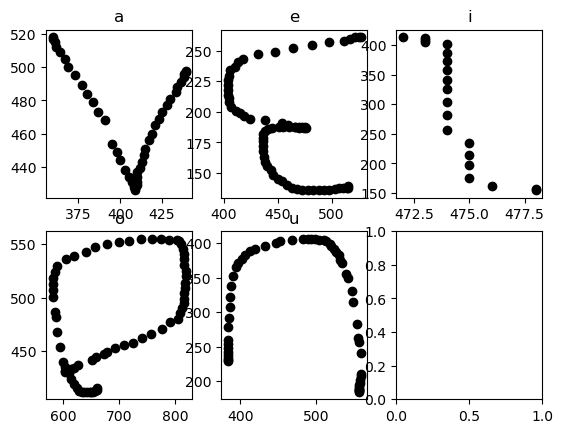

In [3]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 3)
axs = axs.ravel()

for idx, gesture_name in enumerate(gesture_list):
    for point in train_set[gesture_name][0]:
        axs[idx].scatter(point[0], point[1], color='k')
        axs[idx].set_title(gesture_name)
    
plt.show()

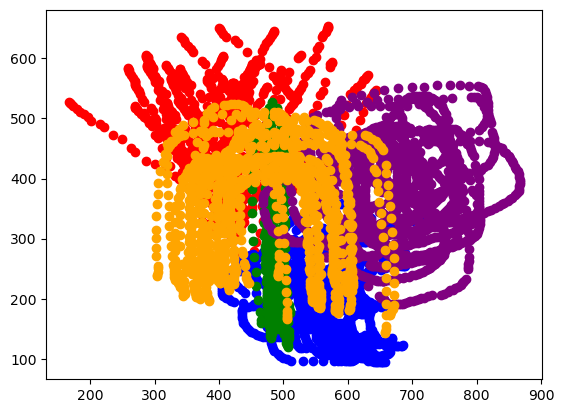

<Figure size 400x400 with 0 Axes>

In [4]:
fig, ax = plt.subplots()

colors = ['red', 'blue', 'green', 'purple', 'orange', 'black']

plt.figure(figsize=(4, 4))

for color, gesture_name in zip(colors, gesture_list):
    for sample_i in range(len(train_set[gesture_name])):
        for point in train_set[gesture_name][sample_i]:
            ax.scatter(point[0], point[1], color=color, label=gesture_name)

# for color, gesture_name in zip(colors, gesture_list):
#     for point in train_set[gesture_name][0]:
#         ax.scatter(point[0], point[1], color=color, label=gesture_name)

plt.show()

2. 在二维的训练数据上，实现一个空间聚类算法（例如 K-Means，任何聚类算法均可）

In [5]:
import random
import math
import numpy as np
import copy

K = 5

train_points = []

# 训练集所有数据
for gesture_name in gesture_list:
    for sample_i in range(len(train_set[gesture_name])):
        for point in train_set[gesture_name][sample_i]:
            train_points.append([point[0]] + [point[1]] + [gesture_name])

# # 训练集每个字母第一例数据
# for gesture_name in gesture_list:
#     for point in train_set[gesture_name][0]:
#         train_points.append([point[0]] + [point[1]] + [gesture_name])

mean_vectors = random.sample(train_points, K)

round = 0
for i in range(1000):
    round += 1
    clusters = [[] for _ in range(K)] 

    for j in range(len(train_points)):
        distances = []
        for i in range(K):
            distance = math.sqrt(
                (train_points[j][0] - mean_vectors[i][0]) ** 2 +
                (train_points[j][1] - mean_vectors[i][1]) ** 2
            )
            distances.append(distance)
        closet_cluster = np.argmin(distances)
        clusters[closet_cluster].append(train_points[j])
        
    old_mean_vectors = copy.deepcopy(mean_vectors)
    for i in range(K):
        if len(clusters[i]) > 0:
            new_mean_vector = [0 for _ in range(2)]
            x_sum = 0
            y_sum = 0
            for cluster_i_point in clusters[i]:
                x_sum += cluster_i_point[0]
                y_sum += cluster_i_point[1]
            new_mean_vector[0] = x_sum / len(clusters[i])
            new_mean_vector[1] = y_sum / len(clusters[i])
            if new_mean_vector[0] != mean_vectors[i][0] or new_mean_vector[0] != mean_vectors[i][0]:
                mean_vectors[i] = new_mean_vector

    changed = False
    for i in range(len(mean_vectors)):
        if mean_vectors[i][0] != old_mean_vectors[i][0] or \
            mean_vectors[i][1] != old_mean_vectors[i][1]:
            changed = True
        
    if not changed:
        print(f'converged at round {round}')
        break

ended at round 35


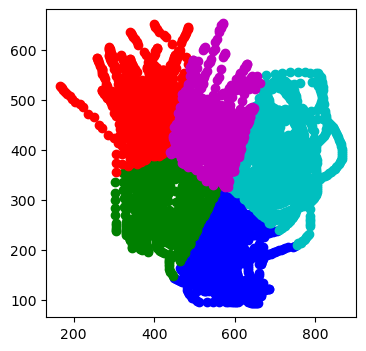

In [6]:
colors = ['b', 'g', 'r', 'c', 'm']

plt.figure(figsize=(4, 4))

for k in range(K):
    for point in clusters[k]:
            plt.scatter(point[0], point[1], c=colors[k])

plt.show()